In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [8]:
dataset = pd.read_csv('loanPrediction.csv')

In [9]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
dataset.shape

(614, 13)

In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dataset = dataset.dropna()

In [14]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
dataset = dataset.replace(to_replace='3+', value=4)

In [19]:
dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

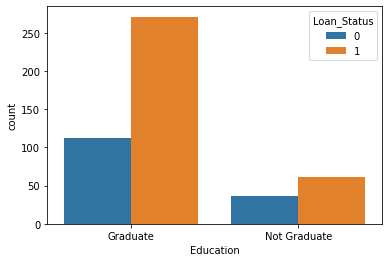

In [20]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

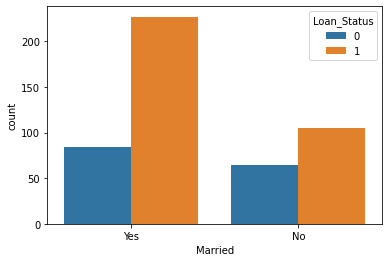

In [21]:
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

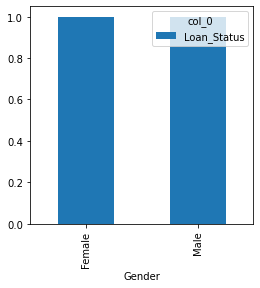

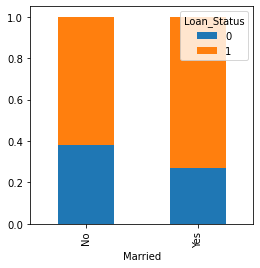

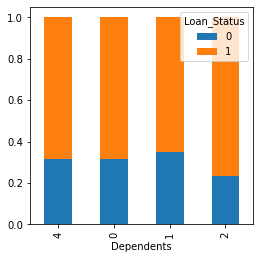

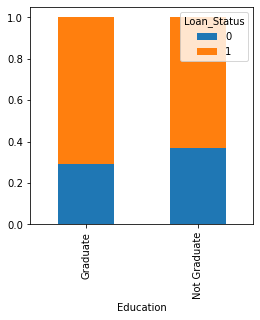

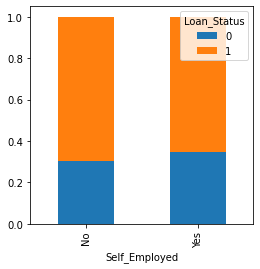

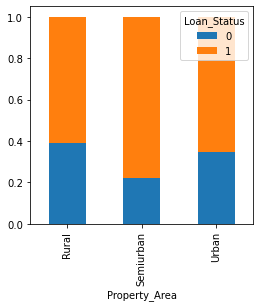

In [22]:
Gender = pd.crosstab(dataset['Gender'],['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Married = pd.crosstab(dataset['Married'], dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))


Dependents = pd.crosstab(dataset['Dependents'], dataset['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))


Education = pd.crosstab(dataset['Education'], dataset['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))


Self_Employed = pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))


Property_Area = pd.crosstab(dataset['Property_Area'], dataset['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))




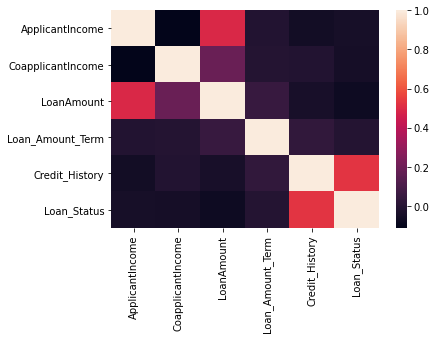

In [23]:
sns.heatmap(dataset.corr())

In [24]:
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataset['Loan_Status']

In [27]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [32]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [33]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7786458333333334


In [34]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [35]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print(type(X_test))
ypred = model.predict(X_test)

print(ypred)

<class 'pandas.core.frame.DataFrame'>
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1]


In [38]:
from sklearn.metrics import f1_score
accuracy = f1_score(Y_test, ypred)
accuracy

0.881118881118881

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
ypred_tree = tree.predict(X_test)

accuracy = f1_score(Y_test, ypred_tree)
accuracy

0.768

In [41]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
ypred_forest = forest.predict(X_test)

accuracy = f1_score(Y_test, ypred_forest)
accuracy

0.8467153284671534

In [42]:
results = pd.DataFrame({
    'Model': ['SVC','LOGISTIC REGRESSION','Decision Tree','Random Forest'],
    'Score': [0.812,0.881,0.740,0.838]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.881  LOGISTIC REGRESSION
0.838        Random Forest
0.812                  SVC
0.740        Decision Tree
